In [1]:
#pip install tensorflow==2.2.1

In [2]:
import tensorflow as tf
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input


from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths

import matplotlib.pyplot as plt
import os
import splitfolders
import cv2
import numpy as np
import random
import glob


In [3]:
#data_path = "D:/majorproject/dataset"
#print(os.listdir(data_path))

In [4]:
!pip install pydot

In [5]:
#splitfolders.ratio(data_path,seed=1337, output="dataset-Splitted", ratio=(0.6, 0.2, 0.2))


In [6]:
baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=(224,224, 3)),weights='imagenet')

def MobileNetV2_model(learning_rate, input_shape,class_number):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape),weights='imagenet')
    print("Number of layers in the base model: ", len(baseModel.layers))

    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu6"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu6"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))

    return model

In [7]:
# Define the input directory containing all pest class folders
input_folder = 'dataset-Splitted-two'

# Define output directories for train, validation, and test sets
#output_folder = 'Dataset_vgg'
train_dir = 'D:/majorproject/myenv/dataset-Splitted-two/train'
test_dir = 'D:/majorproject/myenv/dataset-Splitted-two/val'

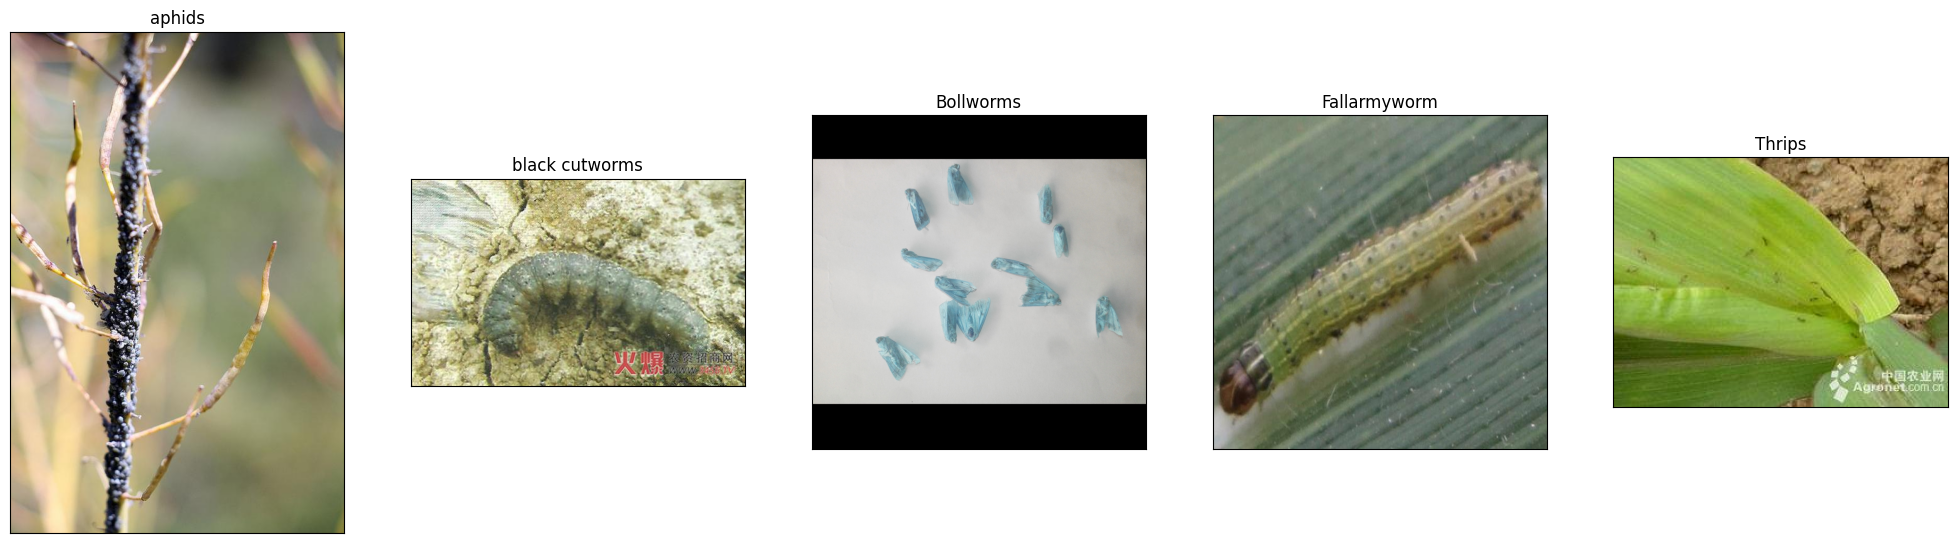

In [8]:
CLASSES = os.listdir(train_dir)

# generating a list with 1 random image from each class 
random_images = []
for i in enumerate(CLASSES):
    random_images.append(random.choice(glob.glob(os.path.join(train_dir,CLASSES[i[0]]+'/*'))))
    
# showing each image in seperate column
n_cols = len(CLASSES)

# plot the images
plt.figure(figsize=(25, 10))
for c,r in zip(range(n_cols),random_images):
    ax = plt.subplot(1, n_cols, c + 1)
    ax.title.set_text(CLASSES[c])
    image = cv2.imread(r)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
batch_size=32

In [11]:
# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4273 images belonging to 5 classes.
Found 1899 images belonging to 5 classes.


In [12]:
# Get the class indices dictionary
label_map = train_generator.class_indices

# Print the label map (optional)
print("Label map:")
for key, value in label_map.items():
    print(f"{key}: {value}")


Label map:
Bollworms: 0
Fallarmyworm: 1
Thrips: 2
aphids: 3
black cutworms: 4


In [13]:
bs = 32
lr = 0.0001
size = (224, 224)
shape = (224,224, 3) 
epochs = 10
class_number = 5

In [14]:
model1 = MobileNetV2_model(lr,shape,class_number)

Number of layers in the base model:  154


In [15]:
model1.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [16]:
# import pickle
# p=open('mobile.pkl','wb')
# pickle.dump(model1,p)
# p.close()

In [18]:
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    
)


Epoch 1/20
133/133 [==============================] - 284s 2s/step - loss: 1.4097 - accuracy: 0.6093 - val_loss: 0.4947 - val_accuracy: 0.8501
Epoch 2/20
133/133 [==============================] - 277s 2s/step - loss: 0.6803 - accuracy: 0.7538 - val_loss: 0.3522 - val_accuracy: 0.8935
Epoch 3/20
133/133 [==============================] - 264s 2s/step - loss: 0.5209 - accuracy: 0.8265 - val_loss: 0.2492 - val_accuracy: 0.9248
Epoch 4/20
133/133 [==============================] - 255s 2s/step - loss: 0.4079 - accuracy: 0.8663 - val_loss: 0.2312 - val_accuracy: 0.9264
Epoch 5/20
133/133 [==============================] - 257s 2s/step - loss: 0.4010 - accuracy: 0.8809 - val_loss: 0.2071 - val_accuracy: 0.9396
Epoch 6/20
133/133 [==============================] - 247s 2s/step - loss: 0.3676 - accuracy: 0.8939 - val_loss: 0.2457 - val_accuracy: 0.9237
Epoch 7/20
133/133 [==============================] - 245s 2s/step - loss: 0.3168 - accuracy: 0.9043 - val_loss: 0.1874 - val_accuracy: 0.9470

In [19]:


# Evaluate the model
loss, accuracy = model1.evaluate(train_generator)
print(f'Train accuracy: {accuracy * 100:.2f}%')


134/134 [==============================] - 171s 1s/step - loss: 0.0624 - accuracy: 0.9778
Train accuracy: 97.78%


In [20]:

test_loss, test_accuracy = model1.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


60/60 [==============================] - 64s 1s/step - loss: 0.1297 - accuracy: 0.9631
Test accuracy: 96.31%


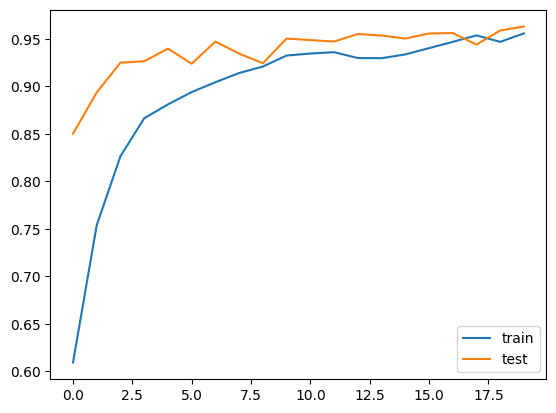

In [21]:
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [23]:
model1.save('mbv2model.h5')

D:\majorproject\myenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 954ms/step
Pests Detected:
Pest Bollworms: 0.9999758005142212


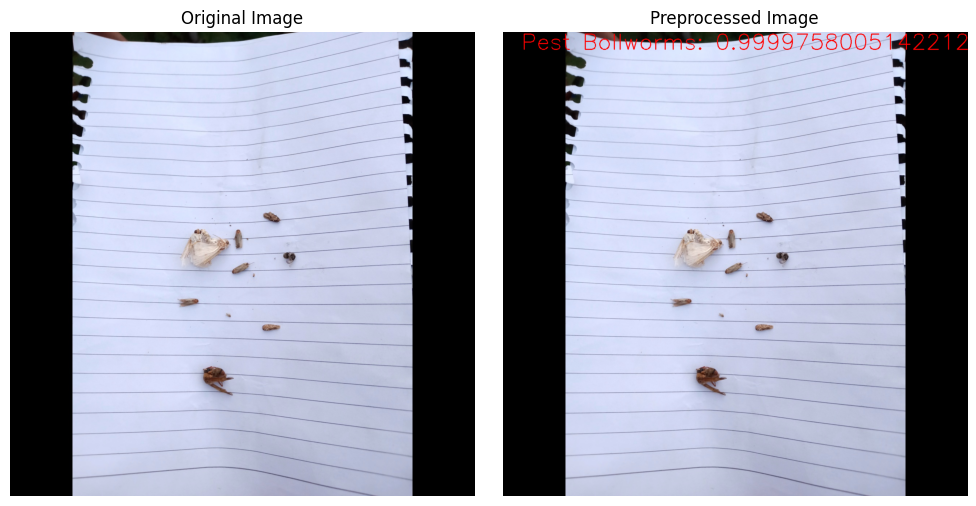

In [24]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

loadedmodel = load_model('mbv2model1_split') 


threshold = 0.8  
p=["Bollworms","Fallarmyworms","Thrips","aphids","black cutworms"]
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_color = (255, 0, 0)  # BGR color format: (blue, green, red)
thickness = 2


def preprocess(frame):
    processed_frame = cv2.resize(frame, (224, 224))  
    processed_frame = processed_frame / 255.0 
    processed_frame = np.expand_dims(processed_frame, axis=0) 
    prediction = loadedmodel.predict(processed_frame)
    pests_detected = []
    for i, pred in enumerate(prediction[0]):
        if pred >= threshold:
            pests_detected.append(f"Pest {p[i]}: {pred}")
    if pests_detected:
        print("Pests Detected:")
        for pest in pests_detected:
            print(pest)
            text=pest
        return cv2.putText(frame, text, (50, 50), font, font_scale, font_color, thickness)

    else:
        print("No pests detected.")
    return cv2.putText(frame, "", (50, 50), font, font_scale, font_color, thickness)


img1 = cv2.imread('Aug_id_050f3511dd7eba73b0fac029.jpg') 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#original image
axs[0].imshow(img1)
axs[0].set_title("Original Image")
axs[0].axis("off")
#print(image)
img2=preprocess(img1)


#processed image
axs[1].imshow(img2)
axs[1].set_title("Preprocessed Image")
axs[1].axis("off")
fig.tight_layout()

# Show the figure
plt.show()


def recommend_pesticide(frame):
    processed_frame = cv2.resize(frame, (224, 224))  
    processed_frame = processed_frame / 255.0 
    processed_frame = np.expand_dims(processed_frame, axis=0) 
    prediction = loadedmodel.predict(processed_frame)
    pests_detected = []
    for i, pred in enumerate(prediction[0]):
        if pred >= threshold:
            pests_detected.append(f"Pest {p[i]}: {pred}")
    print(pests_detected)
    if pests_detected:
        print("Pests Detected:")
        for pest in pests_detected:
            print(pest)
            text=pest
        return cv2.putText(frame, text, (50, 50), font, font_scale, font_color, thickness)

    else:
        print("No pests detected.")
    return cv2.putText(frame, "", (50, 50), font, font_scale, font_color, thickness)